<a href="https://colab.research.google.com/github/JITENDRAGAHERWAR03/-Supermart-Grocery-Sales---Retail-Analytics-ML-Project-/blob/main/Supermart_Grocery_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [ ]:
print (data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [ ]:
print (data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [ ]:
le = LabelEncoder()

In [ ]:
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Order Month'] = le.fit_transform(data['Order Month'])

In [ ]:
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-08-11       2   
1      OD2         Sudha         1            13     8 2017-08-11       3   
2      OD3       Hussain         3             0    13 2017-12-06       4   
3      OD4       Jackson         4            12     4 2016-11-10       3   
4      OD5       Ridhesh         3            18    12 2016-11-10       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0       11.0            7      2017.0  
1    749      0.18  149.80      0       11.0            7      2017.0  
2   2360      0.21  165.20      0        6.0           11      2017.0  
3    896      0.25   89.60      0       10.0           10      2016.0  
4   2355      0.26  918.45      0       10.0           10      2016.0  


/tmp/ipython-input-47-771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


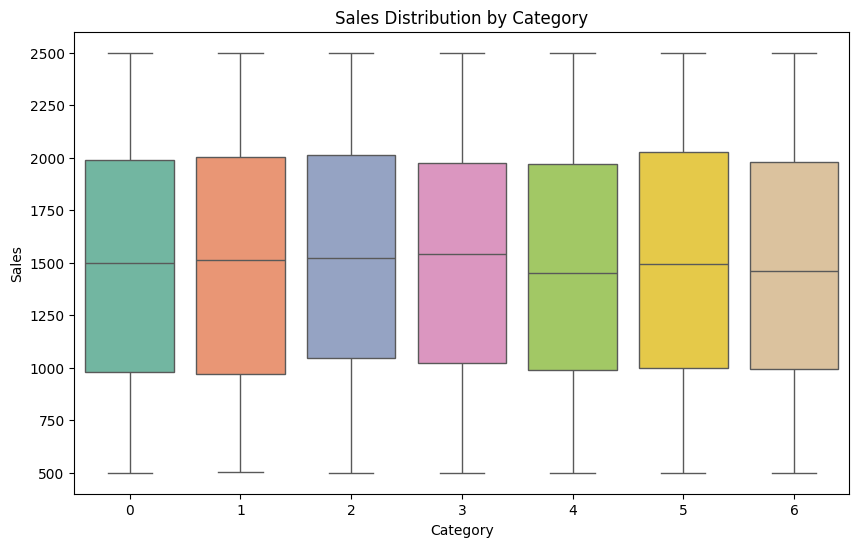

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

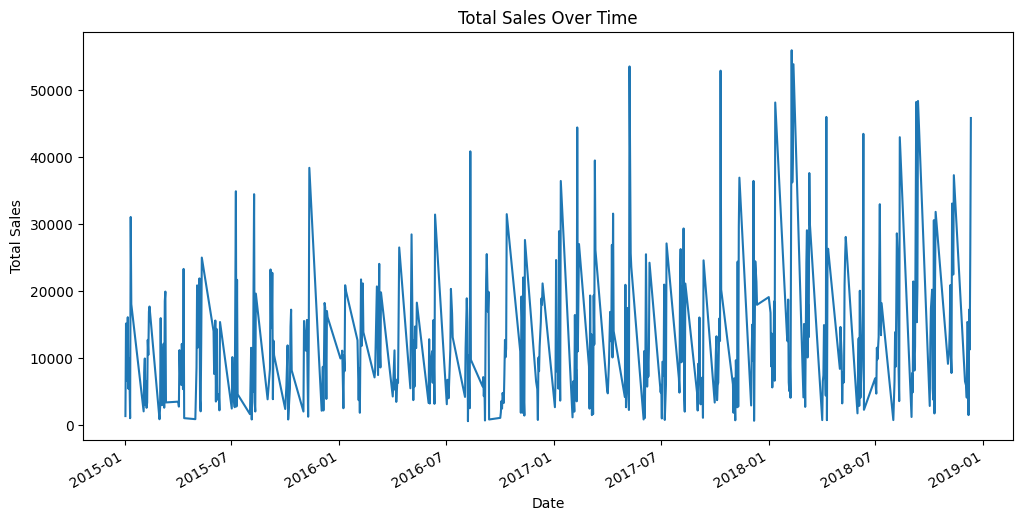

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


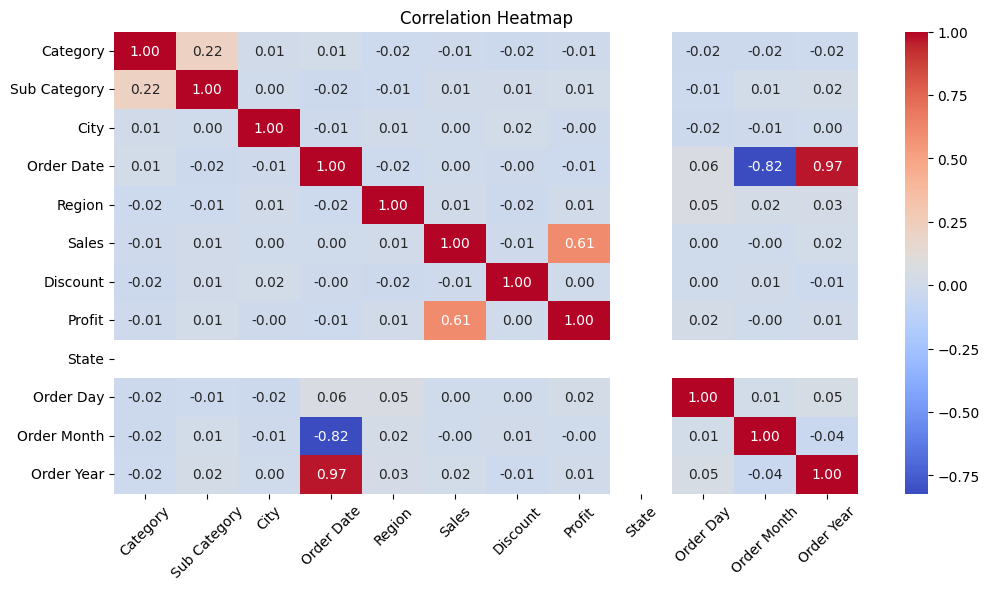

In [ ]:
plt.figure(figsize=(12, 6))
# Drop non-numeric columns before calculating correlation
numeric_data = data.drop(['Order ID', 'Customer Name'], axis=1)
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt =".2f", cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month'])
target = data['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LinearRegression()


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212776.87497963657
R-squared: 0.3548630641779825


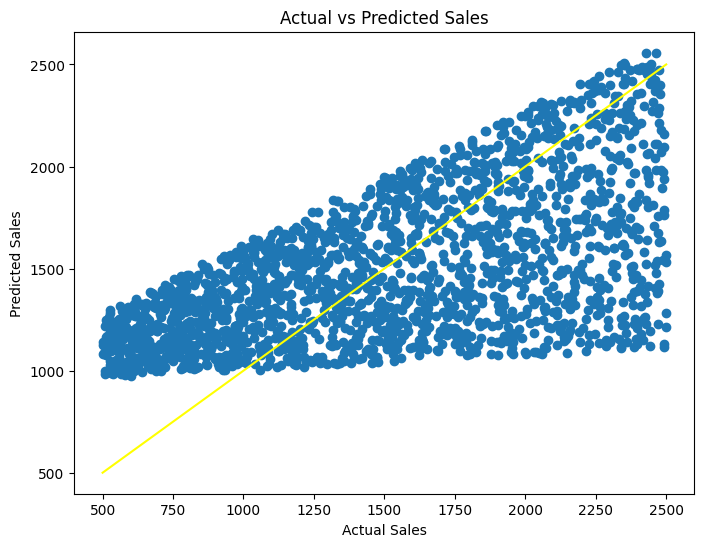

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='yellow')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
